### Checking Nifti Files

Volume shape: (128, 128, 20)


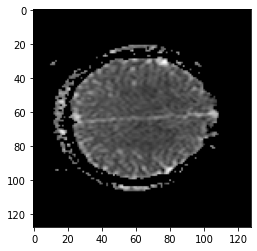

In [5]:
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt

nifti_tst = '/mnt/d/Tesis/neuro_db/Sub-42/2014-03-20/148048.649054.555054.152054.353057.657051.20140320.875855.230/1.3.46.670589.11.0.0.11.4.2.0.651.5.2792.2014032008320093000.nii.gz'

vol = nib.load(nifti_tst).get_fdata()
print(f'Volume shape: {vol.shape}')

plt.imshow(vol[..., 15], cmap='gray')

### Checking Metadata

In [21]:
import pandas as pd
import os

#metadata_csv_path = '/mnt/d/Tesis/neuro_db/metadata.csv'
metadata_csv_path = '/mnt/d/Tesis/neuro_db/metadata_clean.csv'
df = pd.DataFrame()

if os.path.exists(metadata_csv_path):
    df = pd.read_csv(metadata_csv_path)
else:
    print(f'No such a file: {metadata_csv_path}')

df.head(5)

/home/rafa/Tesis/Preprocessing/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OriginalSeriesDir,OriginalPatientId,StudyId,StudyInstanceUID,SeriesInstanceUID,AccessionNumber,SeriesDescription,RepetitionTime,EchoTime,InversionTime,...,BitsAllocated,BitsStored,HighBit,PixelRepresentation,PatientID,DateID,NiftiPath,FormPath,IsNiftiPathCreated,IsFormPathCreated
0,/mnt/d/Tesis/dcm_data/1.2.276.0.7230010.3.1.2....,1.1578346,538130531,1.2.276.0.7230010.3.1.2.1759008939.1280.149820...,1.3.46.670589.11.30123.5.0.4964.20170623104328...,1.2855492.1.1,SAG/3D/T1,25.000000,4.603,NaN,...,16.0,12.0,11.0,0.0,Sub-1985,2855492.0,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/1.2....,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/Repo...,1,1
1,/mnt/d/Tesis/dcm_data/1.2.276.0.7230010.3.1.2....,1.1578346,538130531,1.2.276.0.7230010.3.1.2.1759008939.1280.149820...,1.3.46.670589.11.30123.5.0.4964.20170623104950...,1.2855492.1.1,TRA/T2/2.5 MM,6050.378906,100.000,NaN,...,16.0,12.0,11.0,0.0,Sub-1985,2855492.0,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/1.2....,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/Repo...,1,1
2,/mnt/d/Tesis/dcm_data/1.2.276.0.7230010.3.1.2....,1.1578346,538130531,1.2.276.0.7230010.3.1.2.1759008939.1280.149820...,1.3.46.670589.11.30123.5.0.4964.20170623105513...,1.2855492.1.1,T2W_FLAIR,6000.000000,120.000,2000.0,...,16.0,12.0,11.0,0.0,Sub-1985,2855492.0,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/1.2....,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/Repo...,1,1
3,/mnt/d/Tesis/dcm_data/1.2.276.0.7230010.3.1.2....,1.1578346,538130531,1.2.276.0.7230010.3.1.2.1759008939.1280.149820...,1.3.46.670589.11.30123.5.0.4964.20170623105850...,1.2855492.1.1,sDW_SSh,4429.608398,93.000,NaN,...,16.0,12.0,11.0,0.0,Sub-1985,2855492.0,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/1.2....,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/Repo...,1,1
4,/mnt/d/Tesis/dcm_data/1.2.276.0.7230010.3.1.2....,1.1578346,538130531,1.2.276.0.7230010.3.1.2.1759008939.1280.149820...,1.3.46.670589.11.30123.5.0.8196.20170623110007...,1.2855492.1.1,dsDW_SSh SENSE,4429.608398,93.000,NaN,...,16.0,12.0,11.0,0.0,Sub-1985,2855492.0,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/1.2....,/mnt/d/Tesis/neuro_db/Sub-1985/2017-06-23/Repo...,1,1


In [23]:
# Check whether all data has correctly been created:
def check_path(path: str)-> int:
    if os.path.exists(path):
        return 1
    return 0

df['IsNiftiPathCreated'] = df['NiftiPath'].apply(check_path)
df['IsFormPathCreated'] = df['FormPath'].apply(check_path)

print(df.columns)

Index(['OriginalSeriesDir', 'OriginalPatientId', 'StudyId', 'StudyInstanceUID',
       'SeriesInstanceUID', 'AccessionNumber', 'SeriesDescription',
       'RepetitionTime', 'EchoTime', 'InversionTime', 'ImagePlane',
       'StudyDate', 'MRAdquisitionType', 'PatientSex', 'PatientBirthday',
       'Manufacturer', 'ManufacturersModelName', 'MagneticFieldStrength',
       'SpacingBetweenSlices', 'SliceThickness', 'PixelSpacing',
       'SamplesPerPixel', 'Rows', 'Columns', 'BitsAllocated', 'BitsStored',
       'HighBit', 'PixelRepresentation', 'PatientID', 'DateID', 'NiftiPath',
       'FormPath', 'IsNiftiPathCreated', 'IsFormPathCreated'],
      dtype='object')


In [29]:
# Check number of MRI series and reports correctly converterd

corr_nifti_perc = len(df[df['IsNiftiPathCreated'] == 1]) / len(df)
corr_form_perc = len(df[df['IsFormPathCreated'] == 1]) / len(df)

print(f'Percentage of correctly series processed:{corr_nifti_perc}')
print(f'Percentage of correctly form processed:{corr_nifti_perc}')


Percentage of correctly series processed:1.0
Percentage of correctly form processed:1.0


<AxesSubplot:>

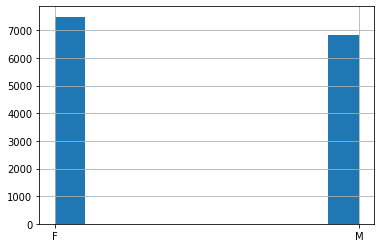

In [109]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15,10))
df['PatientSex'].hist(ax=axes[0])
df[]

/tmp/ipykernel_1020/2259863487.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


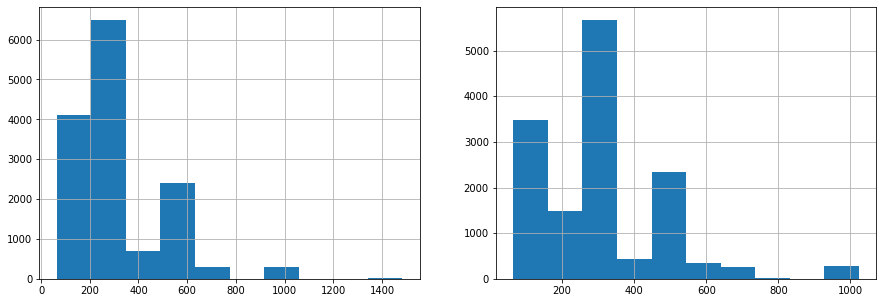

In [112]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(15, 5))

df['Rows'].hist(ax=axes[0])
df['Columns'].hist(ax=axes[1])

fig.show()